## ML Basics: Maximum Likelihood Estimation

#### Introduction

This is the first of a set of little blog-style post that I'm creating to get a better grasp on machine learning concepts. I'm mainly following the book "Deep Learning" by Ian Goodfellow, Yoshua Bengio and Aaron Courville [1], but if any other resources are used I'll be citing them underneath this introduction. While alot of these examples are going to be ones I take from [1] I think sometimes it helps to provide some context or explanation to an equation which is what I'm going to try to do throughought this series. If you see any mistakes please feel free to email me at adibfixeshismistakes@gmail.com.


#### Additional Refernces
https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1 [2] (Jonny Brooks-Bartlett)

https://www.probabilitycourse.com/chapter8/8_2_0_point_estimation.php [3] (Hossein Pishro-Nik)

https://towardsdatascience.com/mse-and-bias-variance-decomposition-77449dd2ff55 [4] (Maksym Zavershynskyi)

https://www.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/ [5] (Patrick Walls)

#### Estimators

Estimators are functions that can be used to provide the best possible estimate ($\hat{\theta}$) of some quantity of interest (${\theta}$) where the true value $\theta$ is some fixed quantity for the distribution. If you're thinking "wow this is a very vague definition", you're right, it is! If {$x^{(1)}, x^{(2)},...,x^{(m)}$} are a set of independent, identically distributed data points collected by sampling some random variable $X$. The *point estimator* is some function g such that:

$$\hat{\theta} = g(x^{(1)}, x^{(2)}, ... x^{(m)})$$

which means pretty much any function can be considered an estimator. If you are sampling some random variable ${X}$ with an unknown parametric probability density we can estimate the parameters of the model by making some educated guesses about the type of distribution the sample data best resembles. 

Using an example from [1], suppose we have our set of samples and they are distributed according to some gaussian distribution with unknown parameters $\mu$ and $\sigma^2$. We have:

$$ P(x^{(i)}; \mu; \sigma^2) = N(x^{(i)}; \mu; \sigma^2) $$

$$ P(x^{(i)}; \mu; \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp^{-\frac{(x^{(i)} - \mu)^2}{2\sigma^2}}$$

We dont know $\mu$ or $\sigma^2$, just that the sampled data may be modelled by a gaussian distribution, but we can estimate $\hat{\mu}$ by just taking the average value of all of the sampled points.

$$\hat{\mu} = \frac{1}{m}\sum^{m}_{i=1}x^{(i)} $$

#### Evaluating Estimators

Notice that while this example has a pretty reasonable estimator for $\hat{\mu}$, the definition of an estimator makes no guarantees that the estimator will accurately predict the value that its trying to estimate. So we need some measure of how well an estimator will perform, or more importantly how closely it will come to the true value of $\theta$. The *bias* and *variance* of an estimator are measures of its offset from the true value of $\theta$ and how much it will vary as we apply the estimator to multiple independently sampled data sets. They are defined as:

$$ Bias(\hat{\theta}) = E[\hat{\theta}] - \theta $$

$$ Variance = Var(\hat{\theta})$$

Continuing the example from before, the bias for our estimator of $\hat{\mu}$ can be calculated as:

$$
\begin{aligned}
Bias(\hat{\mu}) &= E[\hat{\mu}] - \mu \\
                &= E[\frac{1}{m}\sum^{m}_{i=1}x^{(i)}] - \mu \\
                &= \frac{1}{m}\sum^{m}_{i=1}E[x^{(i)}] - \mu \\
                &= \frac{1}{m}\sum^{m}_{i=1}\mu - \mu \\
                &= \mu - \mu \\
                &= 0
\end{aligned}
$$

This shows that using the sample mean as an estimate for the gaussian mean parameter results in an unbiased estimator.

Similarly we can try to calculate the variance of the estimator.

$$
\begin{aligned}
Var(\hat{\mu}) &= Var(\frac{1}{m}\sum^{m}_{i=1}x^{(i)}) \\
               &= \frac{1}{m}Var(\sum^{m}_{i=1}x^{(i)}) \\
               &= \frac{1}{m}\sum^{m}_{i=1}Var(x^{(i)}) \\
               &= \sigma^2
\end{aligned}
$$

While these metrics are useful ultimately what we want to do when choosing between estimators is to pick the one with the lowest amount of error between $\hat{\theta}$ and $\theta$. Mean squared error does exactly this, and is defined as:

$$
\begin{aligned}
MSE(\hat{\theta}) &= E[(\hat{\theta} - \theta)^2] \\
                  &= E[(\hat{\theta}^2 - 2 \hat{\theta}\theta + \theta^2] \\
                  &= E[(\hat{\theta}^2] - 2E[\hat{\theta}\theta] + E[\theta^2]
\end{aligned}
$$

I decomposed the equation a little bit to show you the dependence of the MSE on the bias and variance of an estimator. To complete this derivation we need to work out two other derivations.

$$
\begin{aligned}
Bias(\hat{\theta})^2 &= (E[\hat{\theta}] - \theta)^2 \\
                     &= (E[\hat{\theta}])^2 - 2E[\hat{\theta}\theta] + E[\theta^2] \\
\end{aligned}
$$

We assume that the real value $\theta$ isn't a random variable, so its expectation is equal to its value. This leaves us with:

$$
\begin{aligned}
Bias(\hat{\theta})^2 &= (E[\hat{\theta}])^2 - 2\theta E[\hat{\theta}] + \theta^2 \\
\end{aligned}
$$

The second derivation we need is a decomposition of the variance of an estimator.

$$
\begin{aligned}
Var(\hat{\theta}) &= E[(\hat{\theta} - E[\hat{\theta}])^2] \\
                  &= E[(\hat{\theta}^2 - 2\hat{\theta}E[\hat{\theta}] + (E[\hat{\theta}])^2] \\
                  &= E[(\hat{\theta}^2] - 2E[\hat{\theta}E[\hat{\theta}]] + E[(E[\hat{\theta}])^2] \\
                  &= E[(\hat{\theta}^2] - 2E[\hat{\theta}]^2 + E[\hat{\theta}]^2 \\
                  &= E[(\hat{\theta}^2] - E[\hat{\theta}]^2
\end{aligned}
$$

A potentially non-obvious trick that is used in the derivation above is that $E[E[x]]$ is actually taking the expected value of a scalar non-random variable, so its equal to $E[x]$. This is how we are able to convert $2E[\hat{\theta}E[\hat{\theta}]] = 2E[\hat{\theta}]^2$ and likewise, $E[(E[\hat{\theta}])^2] = E[\hat{\theta}]^2$.

Now finally, if we put these two derivations together:

$$
\begin{aligned}
Var(\hat{\theta}) + Bias(\hat{\theta})^2 &= E[(\hat{\theta}^2] - E[\hat{\theta}]^2 + (E[\hat{\theta}])^2 - 2E[\hat{\theta}\theta] + E[\theta^2] \\
                                        &= E[(\hat{\theta}^2] + 2E[\hat{\theta}\theta] + E[\theta^2] \\
                                        &= MSE(\hat{\theta})
\end{aligned}
$$

This might seem like a long walk for a small drink of water but this derivation of the bias-variance decomposition of the MSE shows that when comparing the viability of two seperate estimators we dont really care about the variance or bias independently, but rather the balance between then that achieves the lowest MSE (obviously ideally we want both of them to be low!).

#### Estimators in Machine Learning
So far I've only been talking about point estimators, but as mentionned earlier an estimator can also be a function. In this case instead of trying to estimate the value of some quantity $\theta$ we are trying to estimate the relationship between two quantities. In this scenario we want to generate a function estimator on a training set of I.I.D data, and then use this estimator on a completely different set (the test data) to try and accurately predict. Suppose our desired output quantity is $y$ and we have a set of I.I.D data samples {$x^{(1)}, x^{(2)}..., x^{(m)}$} in some training dataset S. We want to find an estimate $\hat{f}_S$ of some function f such that:

$$
y = f(x) + \epsilon
$$

Where $\epsilon$ represents all of the noise components of y that cannot be estimated from just $x$ alone with some probability distribution that is different from $S$. In this scenario we want to calculate MSE as:
$$
MSE = E[(y - \hat{f}_S(x))^2]
$$

We can decompose this equation into some key components but we need to utilize some key identities of the variance and expected value of two random variables. The derivation for these identities are going to be omitted, since they're widely available online. Note both a and b in the identities below are random variables. These identities are identical to those presented in [4].

$$
\begin{aligned}
Var(a) &= E[a^2] - E^2[a]\\
E[ab] &= E[a]E[b] + Cov(a,b) \\
Var(a + b) &= Var(a) + Var(b) + 2Cov(a,b) \\
Var(a - b) &= Var(a) + var(b) - 2Cov(a,b) \\
Cov(a, b) &= 0\ when\ a\ and\ b\ are\ independent
\end{aligned}
$$

Now we can break down $MSE[\hat{f(x)}]$.

$$
\begin{aligned}
MSE[\hat{f(x)}] &= E[(y - \hat{f(x)})^2] \\
&= E[y^2] - 2E[y\hat{f(x)}] + E[\hat{f(x)}^2] \\
&= Var(y) + E[y]^2 + Var(\hat{f(x)}) + E[\hat{f(x)}]^2 -2E[y\hat{f(x)}] \\
&= Var(y) + E[y]^2 + Var(\hat{f(x)}) + E[\hat{f(x)}]^2 -2E[(f(x) + \epsilon)\hat{f(x)}] \\
&= Var(y) + E[y]^2 + Var(\hat{f(x)}) + E[\hat{f(x)}]^2 -2E[(f(x))(\hat{f(x))}] -2E[\epsilon\hat{f(x)}]
\end{aligned}
$$

We can now take advantage of the fact that $y = f(x) + \epsilon$. This has already been used to simplify the $-2E[y\hat{f(x)}]$ term, but now we can apply it to get a variance and bias term in terms of $f(x)$ and $\hat{f(x)$.

$$
\begin{aligned}
&= Var(f(x) + \epsilon) + E[f(x) + \epsilon]^2 + Var(\hat{f(x)}) + E[\hat{f(x)}]^2 -2E[(f(x))]E[(\hat{f(x))}] - 2Cov(f(x), \hat{f(x)}) -2E[\epsilon\hat{f(x)}] \\
&= Var(f(x)) + Var(\epsilon) - 2Cov(f(x), \epsilon) + E[f(x)]^2 + 2E[\epsilon]E[f(x)] + 2E[\epsilon]^2 + Var(\hat{f(x)}) + E[\hat{f(x)}]^2 -2E[(f(x))]E[(\hat{f(x))}] + Cov(f(x), \hat{f(x)}) -2E[\epsilon\hat{f(x)}] \\
&= Var(f(x) - \hat{f(x)}) + E[f(x)]^2 - 2E[f(x)]E[\hat{f(x)}] + E[\hat{f(x)}]^2 + Var(\epsilon) - 2Cov(f(x), \epsilon) + 2E[\epsilon]E[f(x)] + 2E[\epsilon]^2 - 2E[\epsilon\hat{f(x)}]\\
&= Var(f(x) - \hat{f(x)}) + (E[f(x)] - E[\hat{f(x)}])^2 + Var(\epsilon) - 2Cov(f(x), \epsilon) + 2E[\epsilon]E[f(x)] + 2E[\epsilon]^2 - 2E[\epsilon\hat{f(x)}]
\end{aligned}
$$

We can simplify this a little further by assuming that the noise term $\epsilon$ is independent of our data set $S$, and that it has some constant mean $c$.

$$
\begin{aligned}
&= Var(f(x) - \hat{f(x)}) + (E[f(x)] - E[\hat{f(x)}])^2 + Var(\epsilon) - 2cE[f(x)] + 2c^2 - 2cE[\hat{f(x)}]
\end{aligned}
$$

This can be simplified further still if we assume our noise model has mean $c=0$.

$$
\begin{aligned}
&= Var(f(x) - \hat{f(x)}) + (E[f(x)] - E[\hat{f(x)}])^2 + Var(\epsilon)
\end{aligned}
$$

We're left with an equation that is very similar to the bias-variance decomposition of the MSE for point estimators. The variance term is $Var(f(x) - \hat{f(x)})$, measuring the amount of jitter we can expect the difference between the true model f(x) and $\hat{f(x)}$ to be as we vary $S$. The bias term is $(E[f(x)] - E[\hat{f(x)}])^2$, which is a measure of how well the estimator model will approximate the real model. Finally we have an additional term $Var(\epsilon)$ which is a measure of how much the noise term will impact the system. 

#### Maximum Likelihood Estimation
So far most of the analysis in this post has been about evaluating estimators, but no explanation has been given as to how we actually generate these estimators. Maximum likelihood estimation is a very simple algorithm for generating an estimator for parameter values of some data model. It states that we should pick the value of $\hat{\theta}$ that gives us the highest probability of observing our training data. Mathematically we can define this as the optimization of the maximum of some likelihood function $L$ operating on the training data {$x_1,x_2,...x_m$} and the unknown parameter values $\hat{\theta}$. We need to make a differentiation between $X_1$, which is the first sampling of random variable $X$ and $x_1$ which is the outcome of the first sampling of random variable $X$.

$$
L(x_{(1)},x_{(2)},...x_{(m)}; \hat{\theta}) = P(X_1 = x_1,X_2 = x_2,X_m = x_m;\hat{\theta})
$$

Where $P$ is the probability distribution (if X is a continuous random variable) or probability mass function (if X is a discrete random varaible). Now the maximum likelihood estimate $\hat{\theta}_{ML}$ is the value of $\hat{\theta}$ that maximizes $L(x_1,x_2,...x_m;\hat{\theta}$. We can also do this for a vector of parameters $\hat{\theta}_1,\hat{\theta}_2,...\hat{\theta}_m$ rather than a single value, adapting from using it as a point estimator to a function estimator instead.

Lets look at some simple examples. Consider a set of data modeled by random variable $X$ with a normal distribution $N(X; \mu, \sigma^2)$. Suppose we want to estimate the mean $\mu$ and variance $\sigma^2$ of $X$ using a sample data set {$x_1,x_2,...x_m$}.

$$
\begin{aligned}
P(X; \mu, \sigma^2) &= \frac{1}{\sqrt{2\pi\sigma^2}}\exp^{-\frac{(X - \mu)^2}{2\sigma^2}} \\
\end{aligned}
$$

A standard method for finding the maximum of a function is to look at its first derivative with respect to the variable that we're trying to optimize. Since we have two unknowns in this situation we can do this by taking the partial derivatives $\frac{dL}{d\mu}$ and $\frac{dL}{d\sigma^2}$. Before differentiating, its a good idea to take the natural log of $L$ to make the differentiation process easier. We're able to do this because the logarithmic function is a montonic increasing function the peak of our exponential function and the peak of its natural log will be at the same spot, and we are only interested in the location of the peak during for optimization. Now, assuming that each sample is I.I.D we can find the partial derivatives.

$$
\begin{aligned}
\ln{L(x_1,x_2,...x_m; \mu, \sigma^2)} &= \ln{\frac{1}{(2\pi\sigma^2)^{\frac{n}{2}}}\exp^{-\frac{\sum^{m}_{i=1}(x_i - \mu)^2}{2\sigma^2}}}\\
&= ln{\frac{1}{(2\pi\sigma^2)^{\frac{n}{2}}}} - \frac{1}{2\sigma^2}\sum^{m}_{i=1}(x - \mu)^2\\
&= -\ln{(2\pi\sigma^2)^{\frac{n}{2}}} - \frac{1}{2\sigma^2}\sum^{m}_{i=1}(x - \mu)^2\\
&= -\frac{n}{2}\ln{2\pi\sigma^2} - \frac{1}{2\sigma^2}\sum^{m}_{i=1}(x - \mu)^2\\
&= -\frac{n}{2}\ln{2\pi} - \frac{n}{2}\ln{\sigma^2} - \frac{1}{2\sigma^2}\sum^{m}_{i=1}(x - \mu)^2\\
\end{aligned}
$$

$$
\begin{aligned}
\frac{dL}{d\mu} &= \frac{1}{\sigma^2}\sum^{m}_{i=1}(x_i - \mu)\\
\frac{dL}{d\sigma^2} &= -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4}\sum^m_{i=1}(x_i - \mu)^2
\end{aligned}
$$

To find the maxima, we have to set $\frac{dL}{d\mu}$ and $\frac{dL}{d\sigma^2}$ to 0 and solve for $\mu$ and $\sigma^2$ respectively.

$$
\begin{aligned}
0 &= \frac{dL}{d\mu}\\
0 &= \frac{1}{\sigma^2}\sum^{m}_{i=1}(x_i - \mu) \\
0 &= \sum^{m}_{i=1}(x_i - \mu) \\
0 &= \sum^{m}_{i=1}x_i - \sum^{m}_{i=1}\mu \\
0 &= \sum^{m}_{i=1}x_i - m\mu\\
\mu &= \frac{1}{m}\sum^{m}_{i=1}x_i
\end{aligned}
$$
Interestingly, MLE converges on the sample mean as the estimator for the gaussian mean, and from the estimator evaluaation section we know that the sample mean is an unbiased estimator of the gaussian mean so the mean-squared error is likely to be low.
$$
\begin{aligned}
0 &= -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4}\sum^m_{i=1}(x_i - \mu)^2\\
0 &= -\frac{n\sigma^2}{2} + \sum^m_{i=1}(x_i - \mu)^2\\
\sigma^2 &= \frac{2}{n}\sum^m_{i=1}(x_i - \mu)^2
\end{aligned}
$$
Likewise MLE converges on an equation that is very close to the sample variance as the optimal estimator for the gaussian variance. Lets look at this working in code!

First lets generate a gaussian function to model our probability distribution.

0.9980994203824746


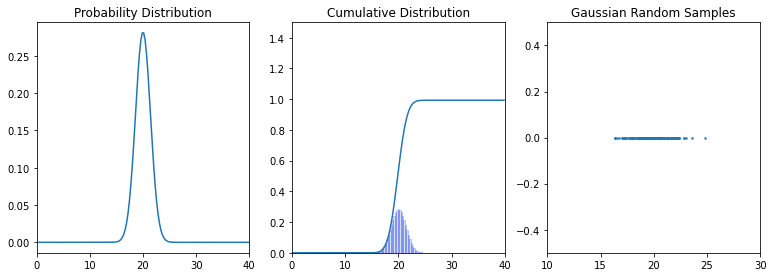

In [52]:
%matplotlib inline
import functools
import matplotlib.pyplot as plt
import numpy as np

def gaussian(mean, variance, x):
    '''Samples a gaussian distribution with specified mean and variance'''
    return (1 / np.sqrt((2 * np.pi * variance))) * np.exp(-0.5 * (((x - mean)**2)/(variance)))

def integrate(f, xaxis, dx):
    '''Calculate the midpoint Riemann sum integral approximation for function f'''
    mid_points = (xaxis[:-1] + xaxis[1:]) / 2
    return mid_points, np.cumsum(f(mid_points)) * dx

def gaussian_sampling(num_samples, mean, variance):
    '''Generates an array of random gaussian distributed points with a parametric distribution
       defined by mean and variance'''
    samples = np.random.rand(num_samples)
    xmin = 0.05 * mean
    xmax = 2.05 * mean
    linear_space = np.linspace(xmin, xmax, num_samples)
    dx = (xmax - xmin) / num_samples
    integral_x, integral_y = integrate(functools.partial(gaussian, mean, variance), linear_space, dx)
    points = []
    for sample in samples:
        try:
            points.append(integral_x[(np.where(integral_y >= sample))[0][0]])
        except IndexError:
            # The randomly generated sample is too close to 1 for us to produce a result with
            # the given number of samples. Ignore it and move on with life.
            continue
    return points


GROUND_TRUTH_MEAN = 20
GROUND_TRUTH_VARIANCE = 2
X_MIN = 0
X_MAX = 40
N_SAMPLE = 150
dx = (X_MAX - X_MIN) / N_SAMPLE

linear_sample = np.linspace(X_MIN, X_MAX, N_SAMPLE)

fig = plt.figure()
pdf = plt.subplot(1,3,1)
pdf.set_xlim(X_MIN, X_MAX)
pdf.set_title("Probability Distribution")

cdf = plt.subplot(1,3,2)
cdf.set_xlim(X_MIN, X_MAX)
cdf.set_ylim(0, 1.5)
cdf.set_title("Cumulative Distribution")

gaussian_random_samples = plt.subplot(1,3,3)
gaussian_random_samples.set_xlim(GROUND_TRUTH_MEAN  - 5 * GROUND_TRUTH_VARIANCE, GROUND_TRUTH_MEAN  + 5 * GROUND_TRUTH_VARIANCE)
gaussian_random_samples.set_ylim(-0.5 , 0.5)
gaussian_random_samples.set_title("Gaussian Random Samples")
plt.subplots_adjust(bottom=0.1, right=1.8, top=0.9)

pdf.plot(linear_sample,
         gaussian(GROUND_TRUTH_MEAN, GROUND_TRUTH_VARIANCE, linear_sample),
         label="Gaussian Probability Distribution")

data_dist = functools.partial(gaussian, GROUND_TRUTH_MEAN, GROUND_TRUTH_VARIANCE)
integral_x, integral_y = integrate(data_dist, linear_sample, dx)
cdf.plot(integral_x, integral_y)
cdf.bar(integral_x, data_dist(integral_x), width=(X_MAX - X_MIN)/ N_SAMPLE, alpha=0.2, edgecolor='b')

samples = np.array(gaussian_sampling(200, GROUND_TRUTH_MEAN, GROUND_TRUTH_VARIANCE))
gaussian_random_samples.scatter(samples, np.zeros(samples.size), s=2)

plt.show()


Looks good! Above we have a gaussian probability distribution function that we've defined with $\mu$ = GROUND_TRUTH_MEAN and

$\sigma^2$ = GROUND_TRUTH_VARIANCE. The parameters are defined as "ground truth" because they are the true parametric values of the data model. Now we'll try to use maximum likelihood estimation to try and get a good estimate $\hat{\mu}$ and $\hat{\sigma^2}$ from our gaussian data samples.